# This is the project for Kaggle

In [1]:
% reset
import numpy as np
from scipy import signal #scipy: scientific python, be used to scientific computation and signal is used to procsess signal 
import matplotlib #be used to plot 
import matplotlib.pyplot as plt 
import pywt #python wavelate transformation 
from os import walk #walk: be used to read file name

from scipy.io import loadmat #be used to get data from .mat document 
import scipy 
import numpy as np


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/home/p2admin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
num_ch = 0 #number of channels
raw_data_length = 0 #

def set_globvar_to_one():
    global num_ch    # Needed to modify global copy of globvar
    num_ch = 16
    global raw_data_length    # Needed to modify global copy of globvar
    raw_data_length = 400*60*10

def print_globvar():
    print(num_ch,raw_data_length)     # No need for global declaration to read value of globvar

set_globvar_to_one()
print_globvar()       # Prints 1

(16, 240000)


## Following code read raw data files

In [3]:
# mypath = './data/train_1'
mypath = '/home/p2admin/Documents/Hope/projects/data/train_1'
f = []
# print(walk(mypath))
for (dirpath, dirnames, filenames) in walk(mypath):
    print(len(filenames))
    for fn in filenames:
        if fn[-3:]=='mat':
            f.extend([fn])
    break
file_path = []
for x in f:
    file_path.extend([dirpath+'/'+x])

ttnf = len(file_path)
print('total number of file found:',ttnf)


1301
('total number of file found:', 1301)


In [122]:
# loadmat('./sample_data/train_2/1_45_1.mat')



In [5]:
raw_sig = np.zeros((raw_data_length,num_ch,ttnf))

label = []
for i,fp in enumerate(file_path):
#     print(fp)
#     print(fp[-5])
    raw_data = loadmat(fp)['dataStruct']
    raw_sig[:,:,i] = raw_data[0][0][0]
    label.append(fp[-5])
#     np.append(raw_sig,raw_data[0][0][0],2)


MemoryError: 

## Following code handles the case when all channel returns zero
Lynn is going to do this part

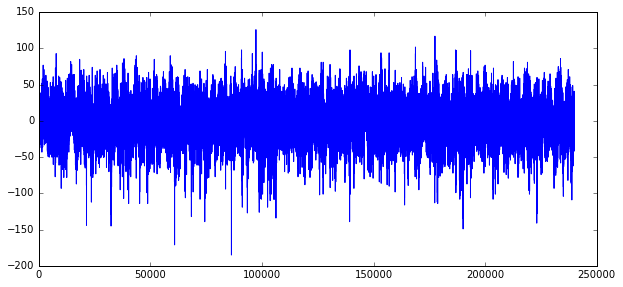

In [124]:
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

raw_sig.shape
sig = raw_sig[:,0,0]
plt.subplot(2,1,1)
plt.plot(sig)
plt.show()


## Following code extract features from signal using wavelet transform

In [125]:

def single_channel_dwt(sig):
#     input 240000
    coeffs = pywt.wavedec(sig, 'db1', level=6)
    cA2, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs
    return cD6

def multi_channel_dwt(sig):
#     input: 240000 * 16
#     return: k * 16
    F = []
    for s_sig in sig.T:
        cd = single_channel_dwt(s_sig)
        F.append(cd)
#     return np.asarray(F)
    return F

def feature_extraction(sig):
#     input: n * 240000 * 16
#     return: #files *channels * features
    FF = []
    for i in range(sig.shape[2]):
        F = multi_channel_dwt(raw_sig[:,:,i])
        FF.append(F)
    return FF

print(raw_sig.shape)
FF = feature_extraction(raw_sig) 

Y = []
for i,F in enumerate(FF):
    tmp = np.asarray(F)
    X = np.reshape(tmp,tmp.shape[0]*tmp.shape[1])
    Y.append(X)
print(len(Y[0]))

(240000, 16, 1301)
60000


In [166]:
np.savez('Y',np.asarray(Y))

## Following code do dim reduction
Deepak can futher improve


### PCA

## Following code do clustering 
Deepak can to do this

## Following code do classification

In [141]:
#  Import any additional functionality you may need here
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time
#  Set the number of training points
#num_train=
import pandas as pd
X_all = pd.DataFrame(T)
y_all = pd.DataFrame(label)

# Set the number of testing points
#num_test = X_all.shape[0] - num_train

#  Shuffle and split the dataset into the number of training and testing points above
rs = cross_validation.ShuffleSplit(28, n_iter=1,test_size=0.25, random_state=0)
for train_index, test_index in rs:
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X_all.loc[train_index,]
    X_test = X_all.loc[test_index,]
    y_train = y_all.loc[train_index,]
    y_test = y_all.loc[test_index,]
    

NameError: name 'T' is not defined

In [ ]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    clf.fit(X_train, y_train)
   
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
#    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
 #   print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import grid_search
from sklearn.metrics import f1_score

clf_A1=grid_search.GridSearchCV(cv=3,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C':[0.01,1]},n_jobs=-1)

clf_A1.fit(X_train,y_train)
print (clf_A1.best_params_)
print (clf_A1.best_score_)
train_predict(clf_A1, X_train, y_train, X_test, y_test)

In [ ]:
y_all[y_all==0]='no'
y_all[y_all==1]='yes'

In [ ]:
X_all